In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [4]:
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array

import json

In [2]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

filename = "/STORE/matej/H3_skims/2017/QCD700/0362263A-C472-E341-AA26-3D3872C78ABE.root"
f = r.TFile.Open(filename)
tree = f.Get("Events")

In [18]:
def histogram(filename, dijet=True, trijet = False):
    
    f = r.TFile.Open(filename)
    tree = f.Get("Events")
    
    if "QCD700" in filename:
        hDijet01Masses = r.TH1F("dijet01m_700","",60,0,3000)
        hDijet02Masses = r.TH1F("dijet02m_700","",60,0,3000)
        hDijet12Masses = r.TH1F("dijet12m_700","",60,0,3000)
        hTrijet012Masses = r.TH1F("trijetm_700","",60,0,3000)
        
    elif "QCD1000" in filename:
        hDijet01Masses = r.TH1F("dijet01m_1000","",60,0,3000)
        hDijet02Masses = r.TH1F("dijet02m_1000","",60,0,3000)
        hDijet12Masses = r.TH1F("dijet12m_1000","",60,0,3000)
        hTrijet012Masses = r.TH1F("trijetm_1000","",60,0,3000)
        
    elif "QCD1500" in filename:
        hDijet01Masses = r.TH1F("dijet01m_1500","",60,0,3000)
        hDijet02Masses = r.TH1F("dijet02m_1500","",60,0,3000)
        hDijet12Masses = r.TH1F("dijet12m_1500","",60,0,3000)
        hTrijet012Masses = r.TH1F("trijetm_1500","",60,0,3000)
    
    elif "QCD2000" in filename:
        hDijet01Masses = r.TH1F("dijet01m_2000","",60,0,3000)
        hDijet02Masses = r.TH1F("dijet02m_2000","",60,0,3000)
        hDijet12Masses = r.TH1F("dijet12m_2000","",60,0,3000)
        hTrijet012Masses = r.TH1F("trijetm_2000","",60,0,3000)

    nEvts = tree.GetEntriesFast()

    for i in range(nEvts):    
        tree.GetEvent(i)


        if tree.nFatJet<3:
            continue

        pts     = tree.FatJet_pt
        etas    = tree.FatJet_eta
        phis    = tree.FatJet_phi
        masses  = tree.FatJet_msoftdrop

        with open("cuts.json", "r") as cuts:
            cuts_dict = json.load(cuts)

        cuts_list = list(cuts_dict.values())

        cut_pts = cuts_list[0]
        cut_etas = cuts_list[1]
        cut_masses = cuts_list[2]

        jet0Flag = pts[0]>cut_pts and abs(etas[0])<cut_etas  and masses[0]>cut_masses
        jet1Flag = pts[1]>cut_pts and abs(etas[1])<cut_etas  and masses[1]>cut_masses
        jet2Flag = pts[2]>cut_pts and abs(etas[2])<cut_etas  and masses[2]>cut_masses


        if not (jet0Flag and jet1Flag and jet2Flag):
            continue

        jet0 = r.TLorentzVector()
        jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])

        jet1 = r.TLorentzVector()
        jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])

        jet2 = r.TLorentzVector()
        jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])

        dijet01 = jet0 + jet1
        dijet02 = jet0 + jet2
        dijet12 = jet1 + jet2
        trijet012 = jet0 + jet1 + jet2

        hDijet01Masses.Fill(dijet01.M())
        hDijet02Masses.Fill(dijet02.M())
        hDijet12Masses.Fill(dijet12.M())
        hTrijet012Masses.Fill(trijet012.M())
        
    if dijet == True:
        dijet01, edges = hist2array(hDijet01Masses,return_edges=True)
        dijet02, edges = hist2array(hDijet02Masses,return_edges=True)
        dijet12, edges = hist2array(hDijet12Masses,return_edges=True)

        edges = edges[0]

        hep.histplot([dijet01,dijet02,dijet12],edges,label=["Dijet 01","Dijet 02","Dijet 12"],stack=True)

        hep.cms.text("Work in progress",loc=0)
        plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
        plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
        plt.xlim([0, 3000])
        plt.legend(loc='best')
            
    if trijet == True:
        plt.style.use([hep.style.CMS])
        counts, edges = hist2array(hTrijet012Masses,return_edges=True)

        edges = edges[0]
            #It returns a list of arrays, where each array represents binning in one dimension. 
            #We only work with 1D so we take edges[0]

        hep.histplot(counts,edges,label="Trijet_012 masses", color="crimson")
        hep.cms.text("Work in progress",loc=0)
        plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
        plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
        plt.xlim([0, 3000])
        plt.legend(loc='upper right')
            

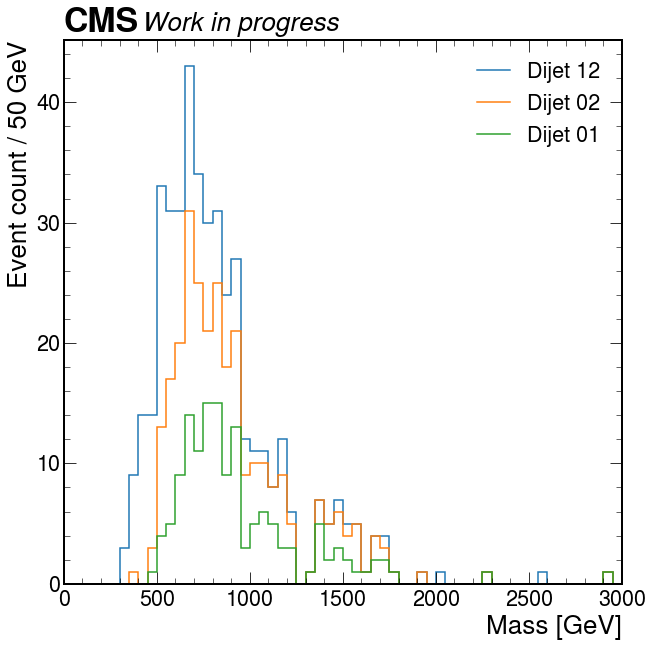

In [15]:
filename = "/STORE/matej/H3_skims/2017/QCD700/0362263A-C472-E341-AA26-3D3872C78ABE.root"
histogram(filename, dijet=True, trijet=False)

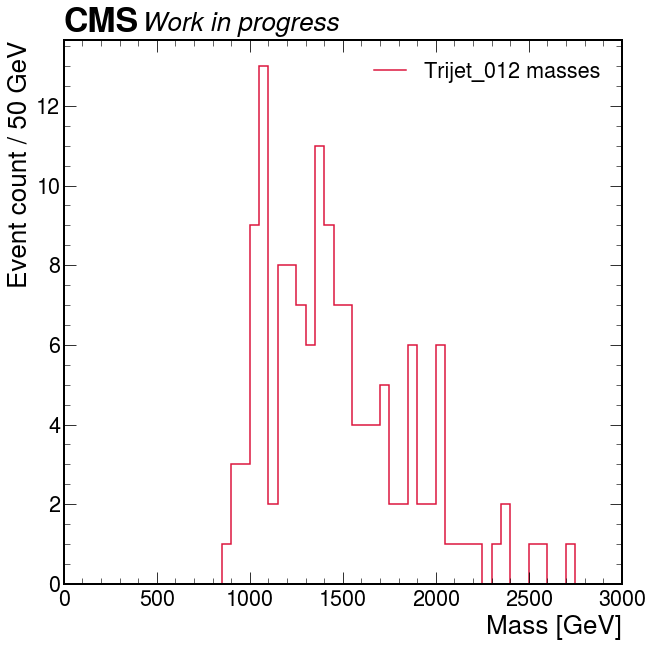

In [19]:
filename = "/STORE/matej/H3_skims/2017/QCD700/0362263A-C472-E341-AA26-3D3872C78ABE.root"
histogram(filename, dijet=False, trijet=True)

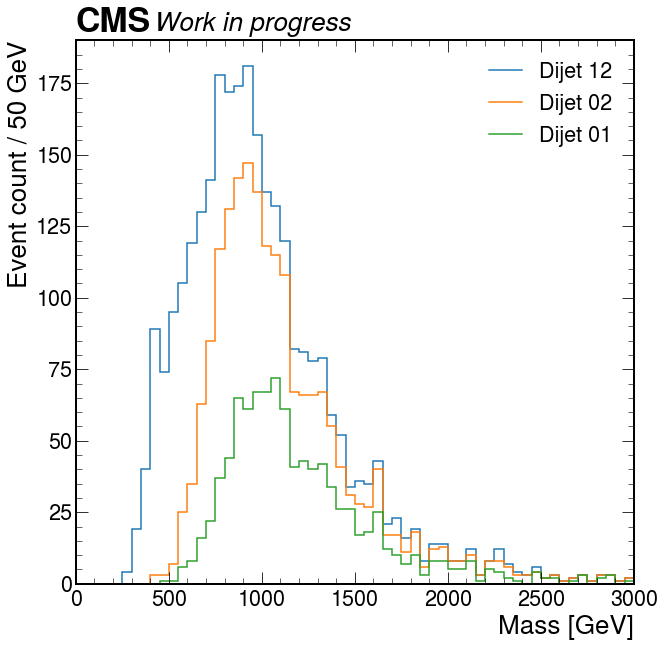

In [21]:
filename_1000 = "/STORE/matej/H3_skims/2017/QCD1000/05210E91-3056-6944-9F5D-EA615D779312.root"
histogram(filename_1000, dijet=True, trijet=False)

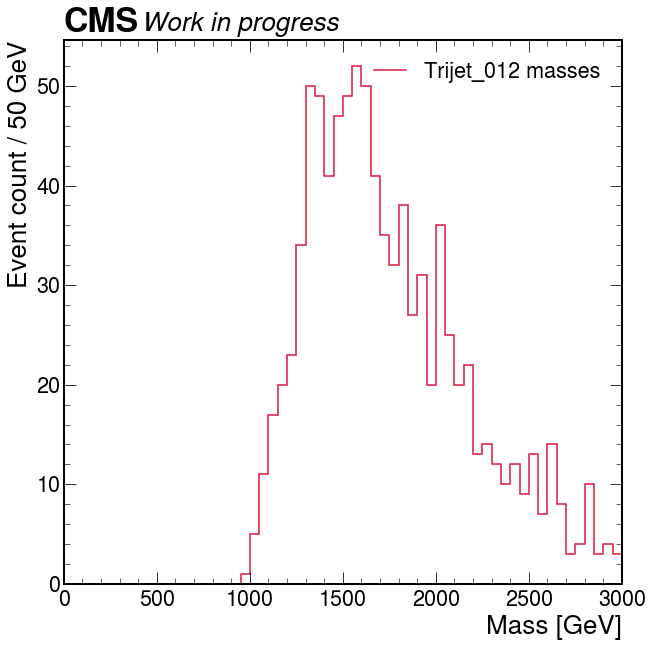

In [22]:
histogram(filename_1000, dijet=False, trijet=True)

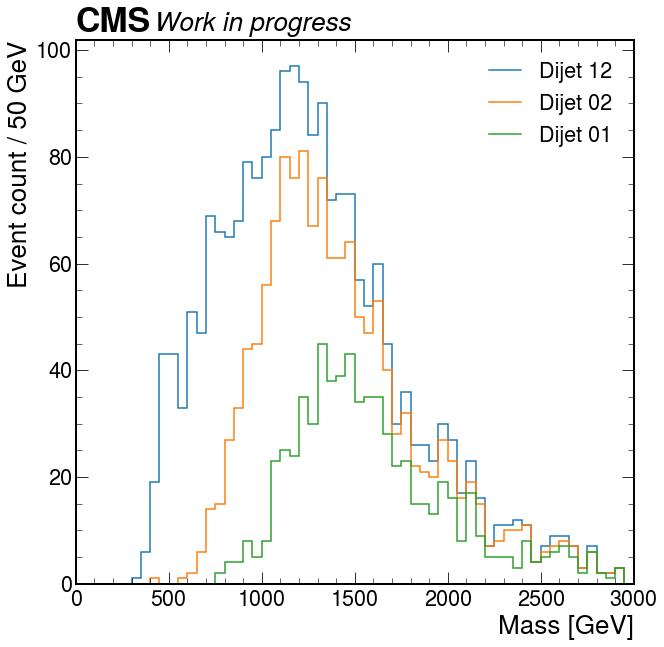

In [24]:
filename_1500 = "/STORE/matej/H3_skims/2017/QCD1500/01183AB1-9A55-4E4C-81D4-2ABC073DFC84.root"
histogram(filename_1500, dijet=True, trijet=False)

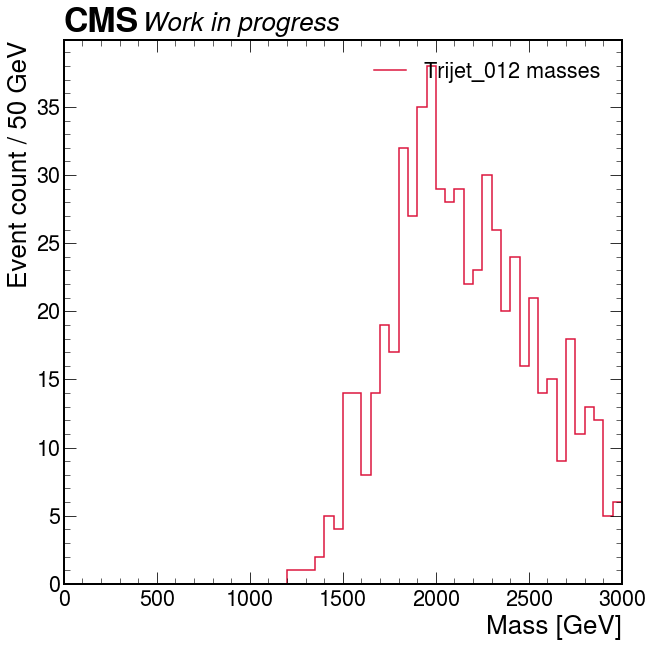

In [25]:
histogram(filename_1500, dijet=False, trijet=True)

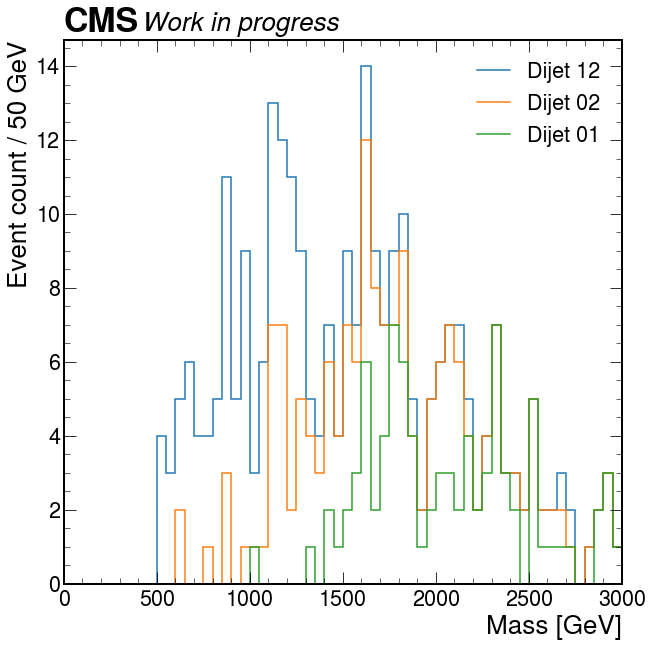

In [27]:
filename_2000 = "/STORE/matej/H3_skims/2017/QCD2000/236EDB6F-C2B8-3649-AA8C-02F139F44B0A.root"
histogram(filename_2000, dijet=True, trijet=False)

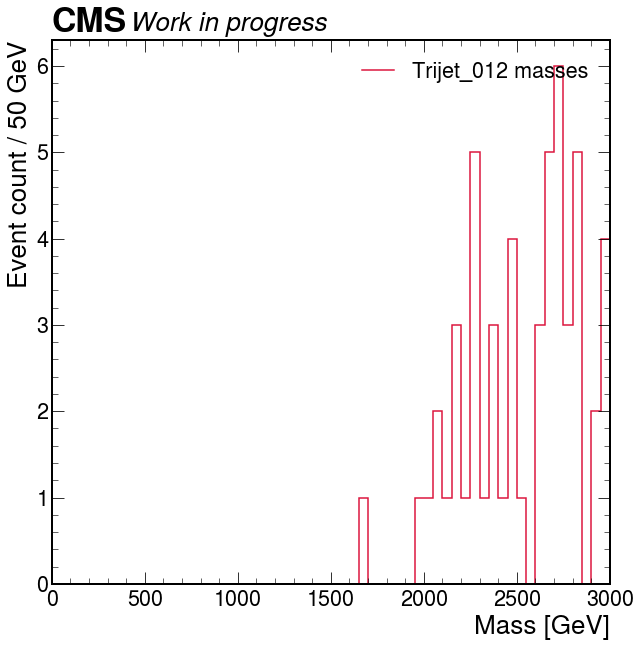

In [28]:
histogram(filename_2000, dijet=False, trijet=True)